In [1]:
import lderiv_control as ld
import copy
import gym
import numpy as np
import scipy.integrate as si
import matplotlib.pyplot as plt
from stable_baselines3 import PPO, DDPG, A2C, TD3
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import CheckpointCallback

In [2]:
env = ld.Swing()

/Users/iandavenport/opt/anaconda3/lib/python3.7/site-packages/gym/spaces/box.py:74: UserWarning: WARN: Box bound precision lowered by casting to float32
  "Box bound precision lowered by casting to {}".format(self.dtype)


In [ ]:
# Save a checkpoint every save_freq steps
checkpoint_callback = CheckpointCallback(
    save_freq=50_000,
    save_path="./logs/",
    name_prefix="rl_model",
)

In [ ]:
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="tb_logs/")
# model.save("logs/rl_model_0_steps")
model.learn(total_timesteps=2e5, callback=checkpoint_callback)

In [ ]:
# dir(checkpoint_callback)

In [3]:
# model.save("trained_model_new")
# del model
env = ld.Swing()
model = PPO.load("logs/rl_model_200000_steps.zip", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [4]:
done = False
obs = env.reset()
while not done:
    action, _states = model.predict(obs)
    obs, reward, done, _ = env.step(action)

phi_hist = np.array(env.phi)
l_hist = np.array(env.L)

x_t = l_hist * np.sin(phi_hist)
y_t = -l_hist * np.cos(phi_hist)
ref_x = np.array(env.lmax) * np.sin(env.phi)
ref_y = -np.array(env.lmax) * np.cos(env.phi)

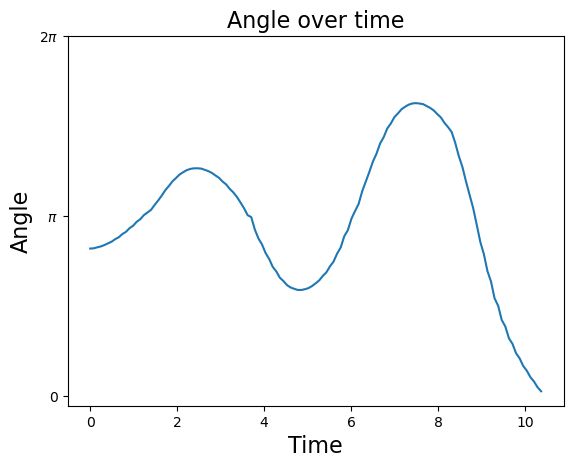

In [5]:
fontdict = {"fontsize": 16}
plt.plot(
    env.tau / 2 * np.arange(len(env.phi)), np.mod(np.array(env.phi) + np.pi, 2 * np.pi)
)
plt.yticks([0, np.pi, 2 * np.pi], ["0", r"$\pi$", r"2$\pi$"])
plt.xlabel("Time", fontdict=fontdict)
plt.ylabel("Angle", fontdict=fontdict)
plt.title("Angle over time", fontdict=fontdict)
plt.savefig("theta.png")

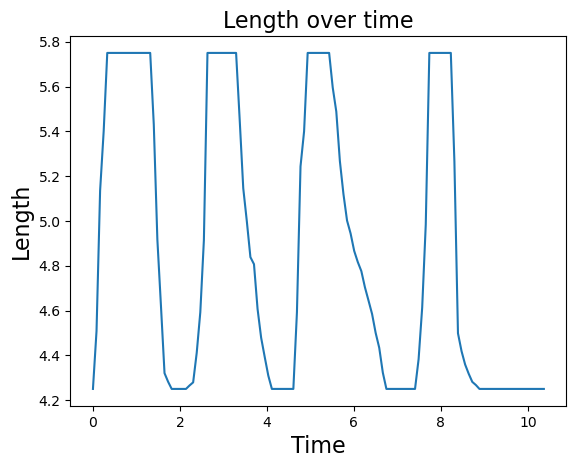

In [6]:
plt.plot(env.tau / 2 * np.arange(len(env.phi)), env.L)
plt.xlabel("Time", fontdict=fontdict)
plt.ylabel("Length", fontdict=fontdict)
plt.title("Length over time", fontdict=fontdict)
plt.savefig("length.png")
plt.show()

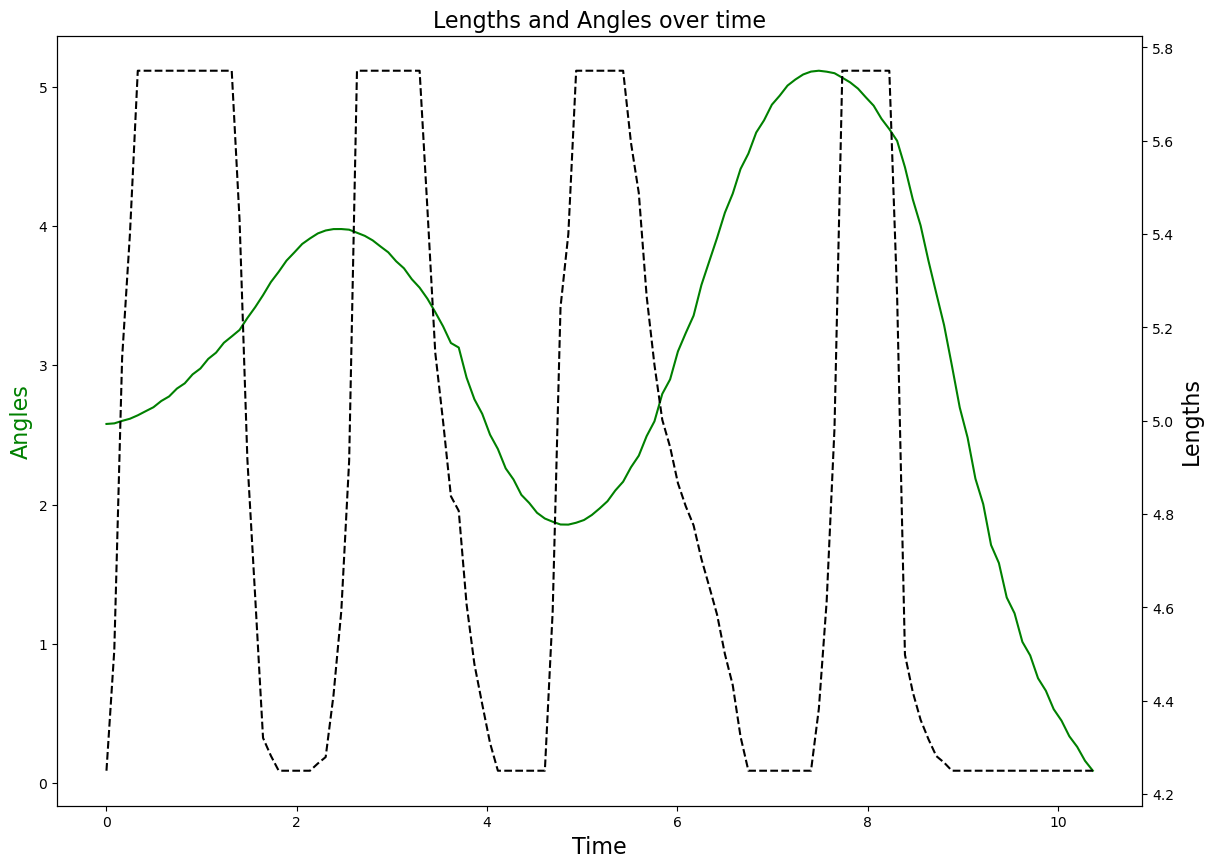

In [22]:
fig, ax1 = plt.subplots(figsize=(14, 10))

ax2 = ax1.twinx()
ax1.plot(
    env.tau / 2 * np.arange(len(env.phi)),
    np.mod(np.array(env.phi) + np.pi, 2 * np.pi),
    "g-",
)
ax2.plot(env.tau / 2 * np.arange(len(env.phi)), env.L, "k--")

ax1.set_xlabel("Time", fontsize = 16)
ax1.set_ylabel("Angles", color="g", fontsize = 16)
ax2.set_ylabel("Lengths", color="k", fontsize = 16)

plt.title("Lengths and Angles over time", fontsize = 16)
plt.savefig("overlay.png")

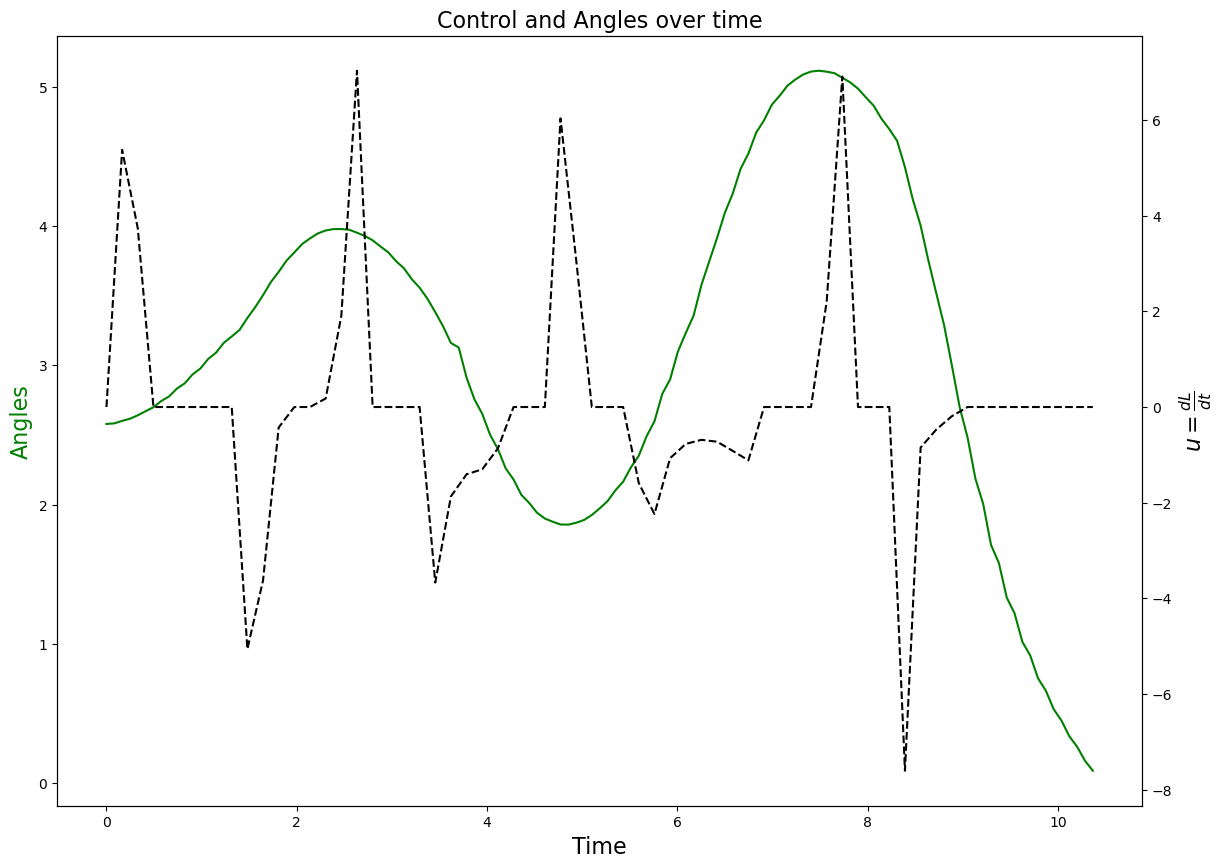

In [21]:
fig, ax1 = plt.subplots(figsize=(14, 10))

ax2 = ax1.twinx()
ax1.plot(
    env.tau / 2 * np.arange(len(env.phi)),
    np.mod(np.array(env.phi) + np.pi, 2 * np.pi),
    "g-",
)
ax2.plot(env.tau * np.arange(len(env.Ldot_hist)), env.Ldot_hist, "k--")

ax1.set_xlabel("Time", fontsize=16)
ax1.set_ylabel("Angles", color="g", fontsize=16)
ax2.set_ylabel(r"$u = \frac{dL}{dt}$", color="k", fontsize=16)

plt.title("Control and Angles over time", fontsize=16)
plt.savefig("control_overlay.png")

In [ ]:
len(env.phi)

In [ ]:
len(env.Ldot_hist)*2

In [9]:
a = env.tau * np.arange(len(env.Ldot_hist))

In [10]:
b = env.tau / 2 * np.arange(len(env.phi))

In [11]:
a

array([ 0.        ,  0.16455079,  0.32910158,  0.49365237,  0.65820316,
        0.82275395,  0.98730474,  1.15185553,  1.31640631,  1.4809571 ,
        1.64550789,  1.81005868,  1.97460947,  2.13916026,  2.30371105,
        2.46826184,  2.63281263,  2.79736342,  2.96191421,  3.126465  ,
        3.29101579,  3.45556658,  3.62011737,  3.78466816,  3.94921894,
        4.11376973,  4.27832052,  4.44287131,  4.6074221 ,  4.77197289,
        4.93652368,  5.10107447,  5.26562526,  5.43017605,  5.59472684,
        5.75927763,  5.92382842,  6.08837921,  6.25293   ,  6.41748079,
        6.58203157,  6.74658236,  6.91113315,  7.07568394,  7.24023473,
        7.40478552,  7.56933631,  7.7338871 ,  7.89843789,  8.06298868,
        8.22753947,  8.39209026,  8.55664105,  8.72119184,  8.88574263,
        9.05029342,  9.2148442 ,  9.37939499,  9.54394578,  9.70849657,
        9.87304736, 10.03759815, 10.20214894, 10.36669973])